# 2.cnn - pytroch - Dog Cat Classifier.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

#Change the Directry to your project in GOogle driver (Create a folder named : "App")
%cd "/content/drive/My Drive/Colab Notebooks"

# List driver
!ls


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks
 Cat_Dog_data
'cnn 2 - pytroch - Dog Cat Classifier.ipynb'
'cnn mnist.ipynb'
'cnn - pytorch'
'Copy of Binary_face_classifier.ipynb'


In [2]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [0]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms, models

torch.set_printoptions(linewidth=120)  # Displa optin for output
torch.set_grad_enabled(True) # Already on by default

batch_size = 32

In [4]:
print(torch.__version__)
print(torchvision.__version__)

1.1.0
0.3.0


In [0]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

## Fully Connected CNN

## Udaicity - Solution2

In [0]:

data_dir = './Cat_Dog_data'

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# test_transform = transforms.Compose([
#                                 transforms.Resize(254),
#                                 transforms.CenterCrop(254),
#                                 transforms.ToTensor()])


train_data =  torchvision.datasets.ImageFolder(data_dir + '/train', transform = transform)
test_data =  torchvision.datasets.ImageFolder(data_dir + '/test', transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
images, labels = next(iter(train_loader))

In [7]:
images, labels = next(iter(train_loader))
print(' images shape', images.shape)
print(' labels shape', labels.shape)

 images shape torch.Size([10, 3, 224, 224])
 labels shape torch.Size([10])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


before  torch.Size([3, 224, 224])
after change np.transpose torch.Size([224, 224, 3])


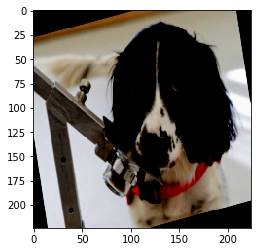

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img 
    convimg = np.transpose(img, (1, 2, 0))
    print('after change np.transpose', convimg.shape)
    plt.imshow(convimg, cmap='gray',interpolation='none')  # convert from Tensor image
    
print('before ', images[0].shape)    
imshow(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


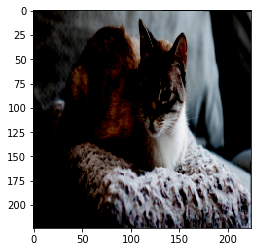

In [9]:
imshow(images[1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


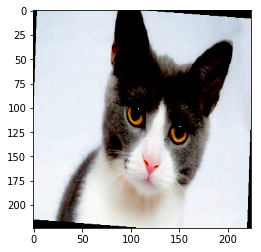

In [10]:

imshow(images[2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


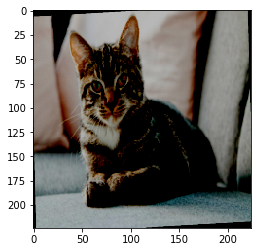

In [11]:
imshow(images[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


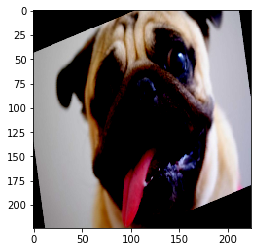

In [12]:

imshow(images[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


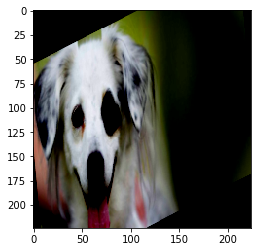

In [13]:

imshow(images[5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


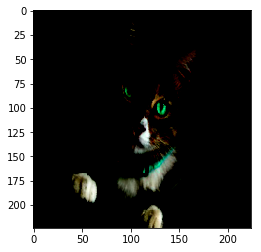

In [14]:

imshow(images[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


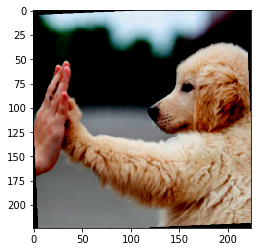

In [15]:

imshow(images[7])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


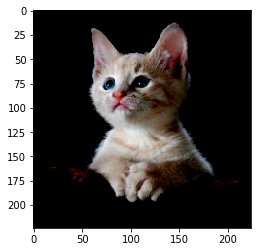

In [16]:
imshow(images[8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after change np.transpose torch.Size([224, 224, 3])


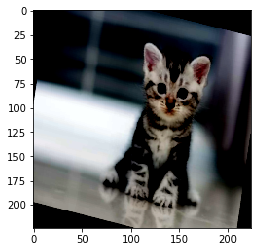

In [17]:
imshow(images[9])


In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 5)
        # max pooling layer
        self.maxpool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(32*53*53, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, 2)
        self.softmax = nn.LogSoftmax(dim=1)

        
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        print('x 1 raw:', x.shape)
        x = self.conv1(x)
        print('x 1 after conv1:', x.shape)
        x = F.relu(x)
        print('x 1 after relue:', x.shape)
        x = self.maxpool(x)
        print('x 1 after max fool:', x.shape)
        print(' end conv 1-------------------------------------------------------------------------------- ')
        
#       x = self.pool(F.relu(self.conv2(x)))
        print('x 2 raw:', x.shape)
        x = self.conv2(x)
        print('x 2 after conv2:', x.shape)
        x = F.relu(x)
        print('x 2 after relue:', x.shape)
        x = self.maxpool(x)
        print('x 2 after max fool:', x.shape)
        
        print(' end conv 2-------------------------------------------------------------------------------- ')
        
        x = self.dropout(x)
        print('x 3 dropout', x.shape)      

        x = x.view(-1, 32 * 53 * 53)
        print('x 4 after flatter', x.shape)
        
        print(' x = x.view(-1, 32 * 53 * 53) end flattern -------------------------------------------------------------------------------- ')

#       x = F.relu(self.fc1(x))        
        x = self.fc1(x)
        print('x 5 after fc1:', x.shape)
        x = F.relu(x)
        print('x 5 after relue:', x.shape)
        
        print('  fc1 end -------------------------------------------------------------------------------- ')
        
#       x = self.dropout(F.relu(self.fc2(x)))        
        x = self.fc2(x)
        print('x 6 after fc1:', x.shape)
        x = F.relu(x)
        print('x 6 after relu:', x.shape)
        x = self.dropout(x)
        print('x 6 dropout', x.shape)
        
        print('  fc2 end -------------------------------------------------------------------------------- ')

#       x = self.softmax(self.fc3(x))
        x = self.fc3(x)
        print('x 7 after fc3', x.shape)
        x = self.softmax(x)
        print('x 6 after softmax:', x.shape)
        
        return x
            

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [20]:

epochs = 30
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        logps = model(images)
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        
        test_loss = 0
        accuracy = 0
        # Trun off gradionts for validation, saves memeory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in test_loader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps =  torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))
             )

x 1 raw: torch.Size([10, 3, 224, 224])
x 1 after conv1: torch.Size([10, 16, 220, 220])
x 1 after relue: torch.Size([10, 16, 220, 220])
x 1 after max fool: torch.Size([10, 16, 110, 110])
 end conv 1-------------------------------------------------------------------------------- 
x 2 raw: torch.Size([10, 16, 110, 110])
x 2 after conv2: torch.Size([10, 32, 106, 106])
x 2 after relue: torch.Size([10, 32, 106, 106])
x 2 after max fool: torch.Size([10, 32, 53, 53])
 end conv 2-------------------------------------------------------------------------------- 
x 3 dropout torch.Size([10, 32, 53, 53])
x 4 after flatter torch.Size([10, 89888])
 x = x.view(-1, 32 * 53 * 53) end flattern -------------------------------------------------------------------------------- 
x 5 after fc1: torch.Size([10, 256])
x 5 after relue: torch.Size([10, 256])
  fc1 end -------------------------------------------------------------------------------- 
x 6 after fc1: torch.Size([10, 84])
x 6 after relu: torch.Size([10,

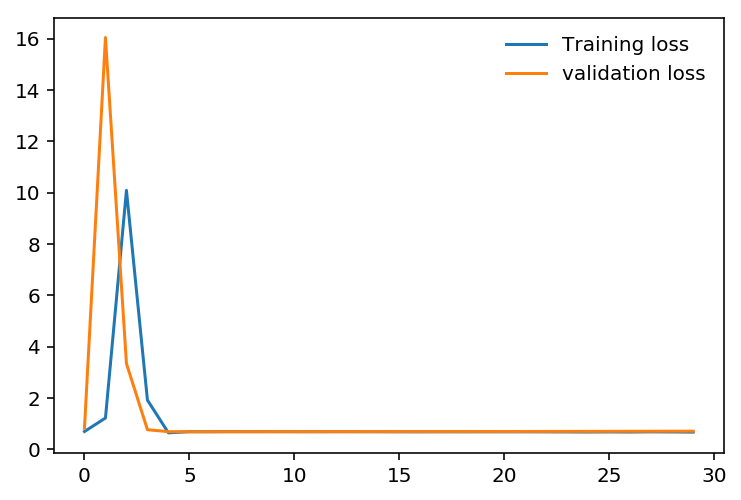

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='validation loss')
plt.legend(frameon=False)